<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/test_pyGAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:724: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(


Generation = 1
Fitness    = 5.17684613697631
Change     = 5.17684613697631
Generation = 2
Fitness    = 8.286624217243224
Change     = 3.1097780802669144
Generation = 3
Fitness    = 27.307952308941637
Change     = 19.021328091698415
Generation = 4
Fitness    = 27.307952308941637
Change     = 0.0
Generation = 5
Fitness    = 31.3311263838477
Change     = 4.023174074906063
Generation = 6
Fitness    = 31.3311263838477
Change     = 0.0
Generation = 7
Fitness    = 216.342799428269
Change     = 185.0116730444213
Generation = 8
Fitness    = 216.342799428269
Change     = 0.0
Generation = 9
Fitness    = 216.342799428269
Change     = 0.0
Generation = 10
Fitness    = 216.342799428269
Change     = 0.0
Generation = 11
Fitness    = 216.342799428269
Change     = 0.0
Generation = 12
Fitness    = 216.342799428269
Change     = 0.0
Generation = 13
Fitness    = 216.342799428269
Change     = 0.0
Generation = 14
Fitness    = 216.342799428269
Change     = 0.0
Generation = 15
Fitness    = 216.342799428269
Chang


Generation = 99
Fitness    = 727.6052889392597
Change     = 0.0
Generation = 100
Fitness    = 727.6052889392597
Change     = 0.0


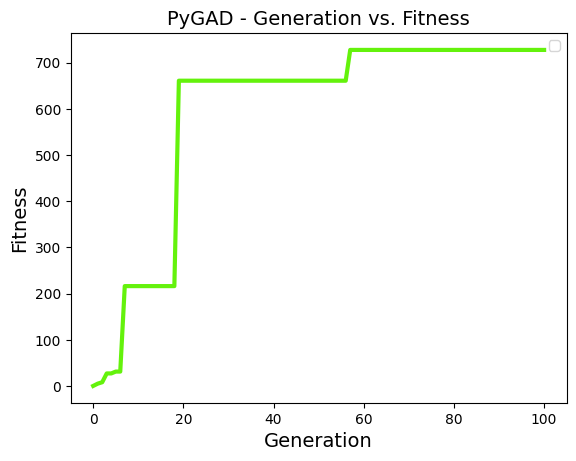

Parameters of the best solution : [ 3.86889711 -2.81725644  2.52911004 -1.05799475 -1.30082137 -1.06756975]
Fitness value of the best solution = 727.6052889392597
Index of the best solution : 0
Predicted output based on the best solution : 43.99862562846202
Best fitness value reached after 57 generations.


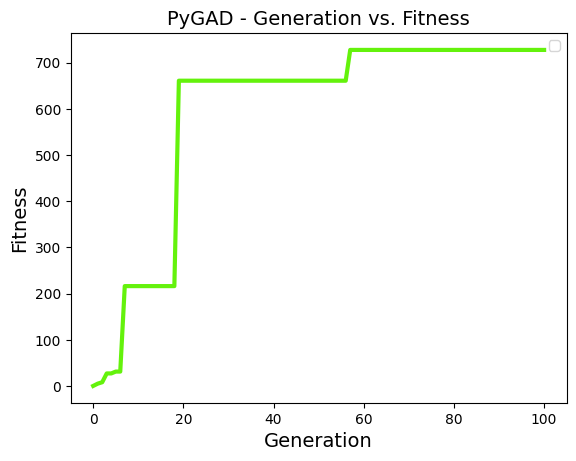

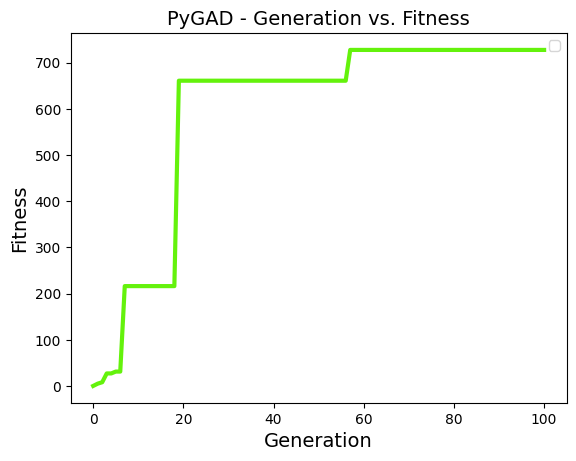

In [2]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")
    print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()